In [3]:
# State Tax Collections http://www2.census.gov/govs/statetax/14staxcd.txt
# Geo Data http://download.geonames.org/export/dump/
# Subsidized Households 2008 http://www.HUDuser.org/portal/picture2008/2008_tract.zip
# Zip Codes https://www.aggdata.com/node/86
# Unemployment Rates http://www.bls.gov/lau/laucntycur14.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
sal = pd.read_csv('../Data/salaries_parent.csv')
sal.shape

(1444, 152)

In [5]:
sal.head(5)

,Zip,B19013_001,no_male_hs_p,no_female_hs_p,at_least_hs_male_p,at_least_hs_female_p,at_least_bach_male_p,at_least_bach_female_p,male_unemployment,female_unemployment,...,T51,T53,T99,Place Name,State_y,State Abbreviation,County,Latitude,Longitude,Unnamed: 60
0,1003,NaN,0.0,0.0,100.0,100.0,35.46798,76.470588,6.92323,7.939714,...,246850,0,197503,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248,NaN
1,1003,NaN,0.0,0.0,100.0,100.0,35.46798,76.470588,6.92323,7.939714,...,246850,0,197503,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248,NaN
2,1003,NaN,0.0,0.0,100.0,100.0,35.46798,76.470588,6.92323,7.939714,...,246850,0,197503,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248,NaN
3,1003,NaN,0.0,0.0,100.0,100.0,35.46798,76.470588,6.92323,7.939714,...,246850,0,197503,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248,NaN
4,1003,NaN,0.0,0.0,100.0,100.0,35.46798,76.470588,6.92323,7.939714,...,246850,0,197503,Amherst,Massachusetts,MA,Hampshire,42.3919,-72.5248,NaN


In [6]:
sal.mean()

Zip                                                               5.465744e+04
B19013_001                                                        4.768131e+04
no_male_hs_p                                                      9.085053e+00
no_female_hs_p                                                    8.216080e+00
at_least_hs_male_p                                                9.091495e+01
at_least_hs_female_p                                              9.178392e+01
at_least_bach_male_p                                              4.441843e+01
at_least_bach_female_p                                            4.946938e+01
male_unemployment                                                 6.126710e+00
female_unemployment                                               5.986530e+00
snap                                                              1.092064e+01
renter                                                            5.686790e+01
median_rent                                         

In [7]:
# eliminate rows with missing Y values (NaN)
sal['missingSalary'] = pd.isnull(sal['salary'])
sal2 = sal[(sal.missingSalary == False)]
sal2.shape

(1412, 153)

In [8]:
sal2.mean()

Zip                                                               5.445178e+04
B19013_001                                                        4.753726e+04
no_male_hs_p                                                      8.709738e+00
no_female_hs_p                                                    8.205198e+00
at_least_hs_male_p                                                9.129026e+01
at_least_hs_female_p                                              9.179480e+01
at_least_bach_male_p                                              4.492534e+01
at_least_bach_female_p                                            4.949808e+01
male_unemployment                                                 6.185822e+00
female_unemployment                                               6.009028e+00
snap                                                              1.096319e+01
renter                                                            5.689759e+01
median_rent                                         

In [10]:
sal2.fillna(sal2.mean(), inplace=True)
sal2.isnull().values.any()

C:\Anaconda3\lib\site-packages\pandas\core\generic.py:3178: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


True

In [11]:
# list of X vars to include
# X_numeric_features = ['sup1', 'sup2', 'sup3', 'sup4', 'sup5', 'disabled', 'yearsInPosition', 
#          'yearsInProfession', 'age', 'cred1', 'cred2', 'inst1', 'inst2', 'inst3', 'inst4', 'inst5', 'instBudget', 'instSize']
# X_numeric = sal2[X_numeric_features]
# X_categorical_features = ['Function', 'gender', 'race', 'highestDegree', 'Category', 'instType']
# X_categorical = sal2[X_categorical_features]
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
X_numeric = sal2.select_dtypes(include=numerics)
X_categorical = sal2.select_dtypes(exclude=numerics)

In [12]:
# create dummy variables for each of the categorical features
# DOC: http://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html

# Function_dummies = pd.get_dummies(X_categorical['Function'])
# gender_dummies = pd.get_dummies(X_categorical['gender'])
# race_dummies = pd.get_dummies(X_categorical['race'])
# highestDegree_dummies = pd.get_dummies(X_categorical['highestDegree'])
# Category_dummies = pd.get_dummies(X_categorical['Category'])
# instType_dummies = pd.get_dummies(X_categorical['instType'])

# X_dummy_features = pd.concat([Function_dummies, gender_dummies, race_dummies, highestDegree_dummies, Category_dummies, instType_dummies], axis=1)

# # convert to ndarray
# X_dummy_features = X_dummy_features.as_matrix()

In [13]:
# X_categorical.shape
for i in X_categorical.columns:
    temp_dummies = pd.get_dummies(X_categorical[i])
    X_dummy_features = pd.concat([temp_dummies])
#     print (i)
# for i in X_catagorical.length()
#     print i
X_dummy_features = X_dummy_features.as_matrix()

In [14]:
# impute missing values in numerical features
# DOC: http://scikit-learn.org/stable/modules/preprocessing.html

from sklearn.preprocessing import Imputer
imp = Imputer()
imp.fit(X_numeric)
X_numeric_imputed = imp.transform(X_numeric)

In [15]:
X = np.concatenate((X_dummy_features, X_numeric_imputed), axis=1)

In [16]:
# y is salary
y = sal2.iloc[:, 98].values
print(y)

[ 77308.  70863.  56557. ...,  49088.  32000.  32000.]


In [17]:
# create training and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

In [18]:
# keep track of variance on test data, to graph
var_to_graph = {}
# bring residual sum of squares from regression1.ipynb
var_to_graph['simpReg'] = 265376883.08

In [19]:
from sklearn import datasets, linear_model
# DOC: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html

Intercept: 
 0.0164928239101
Coefficients: 
 [ -1.64928257e-02  -7.68446179e-14  -7.35325429e-14   1.19013055e-11
  -2.58529316e-11  -1.18959877e-11   2.59155995e-11   6.38966657e-12
  -1.11206877e-12   1.08015088e-10  -6.06557834e-11  -2.13005328e-11
   8.41652686e-12   1.67072205e-12   5.64050958e-11  -1.53663714e-12
  -1.79233567e-11   3.28717022e-11   1.81554712e-11  -7.57277307e-11
  -2.81703521e-11   8.22138782e-12   8.32089957e-12   4.01961629e-11
  -2.61467917e-11   9.55178482e-12   2.97221671e-11  -1.24460492e-11
  -1.42890259e-11   1.42885926e-11  -2.79597813e-12   3.60573333e-13
   1.85082906e-12   4.21392294e-12  -1.28025207e-12   5.86706332e-12
  -4.74470962e-12   3.32244060e-12   3.82801435e-12   1.21775669e-12
  -1.42485156e-12   1.16836926e-11  -2.10615206e-12  -6.70793564e-12
  -4.94635582e-13   2.50173916e-12  -1.39057295e-11   1.19936040e-11
   2.37337450e-12   7.45046646e-12  -1.09096152e-12  -1.24495372e-11
   7.46511728e-12   6.16538071e-13   5.22892493e-13  -6.33

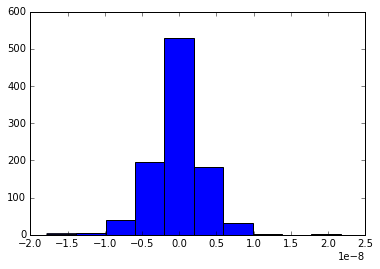

Distribution of prediction error on test data:


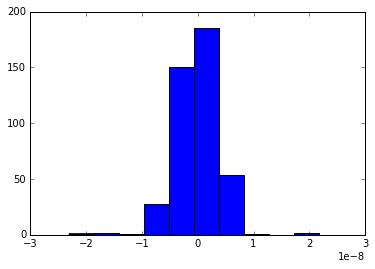

In [20]:
# Create linear regression object
regr = linear_model.LinearRegression()

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
regr.fit(X_train, y_train)

# The intercept
print('Intercept: \n', regr.intercept_)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares, training data: %.2f"
      % np.mean((regr.predict(X_train) - y_train) ** 2))
print("Residual sum of squares, test data: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
var_to_graph['multReg_linear'] = np.mean((regr.predict(X_test) - y_test) ** 2)
# Explained variance score: 1 is perfect prediction
print('Variance score, training data: %.2f' % regr.score(X_train, y_train))
#vector of prediction error
print('Distribution of prediction error on training data:')
predError = regr.predict(X_train) - y_train
plt.hist(predError)
plt.show()

print('Distribution of prediction error on test data:')
predError = regr.predict(X_test) - y_test
plt.hist(predError)
plt.show()

In [21]:
from sklearn.preprocessing import PolynomialFeatures
# DOC: http://scikit-learn.org/stable/modules/preprocessing.html

poly = PolynomialFeatures(2)
X_poly = poly.fit_transform(X)

In [22]:
# create training and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X_poly, y, test_size=0.3, random_state=0)

Intercept: 
 1348.37501055
Coefficients: 
 [  1.48380533e+00  -7.74358354e-01   4.55466950e-04 ...,  -5.14941113e-02
   1.79467100e-02  -1.12598783e-03]
Residual sum of squares, training data: 0.00
Residual sum of squares, test data: 27126.91
Variance score, training data: 1.00
Distribution of prediction error on training data:


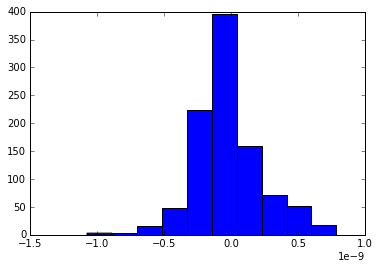

Distribution of prediction error on test data:


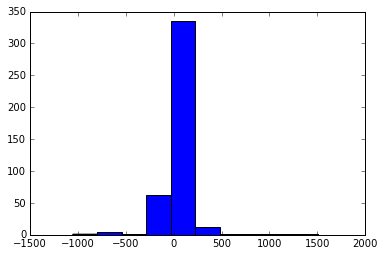

In [23]:
## POLYNOMINAL 
# Create linear regression object
poly = linear_model.LinearRegression(normalize=True)

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
poly.fit(X_train, y_train)

# The intercept
print('Intercept: \n', poly.intercept_)
# The coefficients
print('Coefficients: \n', poly.coef_)
# The mean square error
print("Residual sum of squares, training data: %.2f"
      % np.mean((poly.predict(X_train) - y_train) ** 2))
print("Residual sum of squares, test data: %.2f"
      % np.mean((poly.predict(X_test) - y_test) ** 2))
var_to_graph['multReg_poly'] = np.mean((poly.predict(X_test) - y_test) ** 2)
# Explained variance score: 1 is perfect prediction
print('Variance score, training data: %.2f' % poly.score(X_train, y_train))
#vector of prediction error
print('Distribution of prediction error on training data:')
predError = poly.predict(X_train) - y_train
plt.hist(predError)
plt.show()

print('Distribution of prediction error on test data:')
predError = poly.predict(X_test) - y_test
plt.hist(predError)
plt.show()

Intercept: 
 2.28638964472e-06
Coefficients: 
 [  0.00000000e+00   1.60500735e-12  -3.68977735e-12  -7.99596402e-10
   4.51249890e-09   7.99622062e-10   2.23963286e-09   8.63273180e-10
  -2.95417627e-10  -2.49173619e-09  -3.18196878e-09  -6.54228130e-09
   4.36468469e-10   2.19320019e-10  -1.28537238e-09   2.26733737e-07
  -2.26667191e-07  -2.27511428e-07  -2.25276346e-07  -2.26388452e-07
  -2.27809632e-07  -2.26578192e-07  -2.28623178e-07  -2.26052798e-07
  -2.27375270e-07  -2.26575288e-07  -2.26367900e-07  -2.27023363e-07
  -2.26375600e-07  -2.26786208e-07  -2.26549778e-07  -2.26873681e-07
  -2.26999512e-07  -2.26641642e-07  -2.26861565e-07  -2.26664719e-07
  -2.26830708e-07  -2.26584832e-07  -2.27165060e-07  -2.26576820e-07
   8.16433519e-08  -8.15174618e-08  -8.15576408e-08  -8.18399684e-08
  -8.19042546e-08  -8.16119674e-08  -8.17107723e-08  -8.15956564e-08
  -8.16314484e-08  -8.16790659e-08  -8.17790836e-08  -8.15203625e-08
  -8.12903370e-08  -8.15452917e-08  -8.13679397e-08  -8.

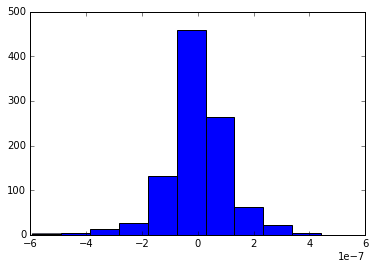

Distribution of prediction error on test data:


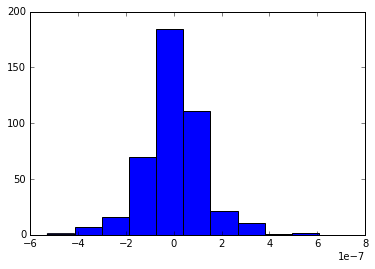

In [24]:
## RIDGE REGRESSION
# DOC: http://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html

# create training and test sets
from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
         X, y, test_size=0.3, random_state=0)

# Create linear regression object
regr = linear_model.Ridge()

# Train the model using the training sets
X_train_no_intercept = X_train
X_train = X_train.reshape(-1, X_train.shape[1])
regr.fit(X_train, y_train)

# The intercept
print('Intercept: \n', regr.intercept_)
# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean square error
print("Residual sum of squares, training data: %.2f"
      % np.mean((regr.predict(X_train) - y_train) ** 2))
print("Residual sum of squares, test data: %.2f"
      % np.mean((regr.predict(X_test) - y_test) ** 2))
var_to_graph['multReg_ridge'] = np.mean((regr.predict(X_test) - y_test) ** 2)
# Explained variance score: 1 is perfect prediction
print('Variance score, training data: %.2f' % regr.score(X_train, y_train))
#vector of prediction error
print('Distribution of prediction error on training data:')
predError = regr.predict(X_train) - y_train
plt.hist(predError)
plt.show()

print('Distribution of prediction error on test data:')
predError = regr.predict(X_test) - y_test
plt.hist(predError)
plt.show()

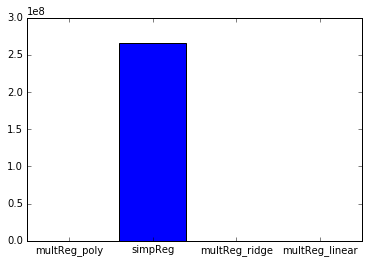

In [25]:
# bar graph of dict with Residual Sum of Squares on test datasets

#var_to_graph['multReg_poly'] = 0
plt.bar(range(len(var_to_graph)), var_to_graph.values(), align='center')
plt.xticks(range(len(var_to_graph)), var_to_graph.keys())

plt.show()